Hebani Duggal hd288 Problem Set 6

In [3]:
counter = 0
rank = 1

while (counter <= 80000):
    counter += 15270/rank
    rank = rank + 1

print counter 
print rank

counter2 = 0
rank2 = 1

while (counter2 <= 120000):
    counter2 += 15270/rank2
    rank2 = rank2 + 1

print counter2
print rank2

80048
107
120002
1526


In [4]:
import numpy as np

In [5]:
ptexts=[open('ps2data/p{}.txt'.format(i)).read() for i in range(30)]
stexts=[open('ps2data/s{}.txt'.format(i)).read() for i in range(30)]
ttexts=[open('ps2data/t{}.txt'.format(i)).read() for i in range(10)]
total = ptexts+stexts+ttexts

In [6]:
import matplotlib.pyplot as plt 
from collections import Counter
import re


distwords = [len(Counter(set(re.findall("[a-z0-9']+",ptexts[0].lower()))))]
words = [len(ptexts[0])]
txt = ptexts[0]
for i in range(1,len(total)):
    words.append(len(total[i])+words[i-1])
    
    txt += total[i]
    distwords.append(len(Counter(set(re.findall("[a-z0-9']+",txt.lower())))))
    
#for txt in stexts:
 #   distwords.append(len(Counter(set(re.findall("[a-z0-9']+",txt.lower())))))
#  words.append(len(txt))
    
#for txt in ttexts:
 #   distwords.append(len(Counter(set(re.findall("[a-z0-9']+",txt.lower())))))
#  words.append(len(txt))
    



[(6082, 460), (10769, 726), (19421, 1146), (23394, 1340), (28184, 1558), (35577, 1860), (39993, 2029), (44574, 2179), (49889, 2343), (58642, 2669), (63311, 2885), (68726, 3031), (75532, 3237), (82175, 3434), (87619, 3565), (94051, 3694), (103499, 3897), (108359, 4016), (113449, 4142), (119092, 4224), (123611, 4314), (128540, 4409), (133718, 4493), (138216, 4568), (145118, 4731), (153170, 4875), (159347, 5075), (165920, 5182), (173291, 5294), (179660, 5384), (184459, 5506), (191006, 5676), (197597, 5848), (206098, 6059), (211113, 6193), (218291, 6396), (226388, 6581), (231340, 6646), (240292, 6764), (246891, 6951), (254494, 7126), (264170, 7347), (271609, 7416), (277928, 7575), (284457, 7680), (291493, 7796), (297917, 7876), (304163, 7982), (308099, 8085), (311651, 8134), (317590, 8228), (324711, 8353), (330754, 8462), (336730, 8562), (342899, 8665), (350524, 8810), (356129, 8891), (363214, 8977), (371315, 9115), (378691, 9236), (384242, 9311), (391736, 9411), (400099, 9507), (407597, 9

NameError: name 'intercept' is not defined

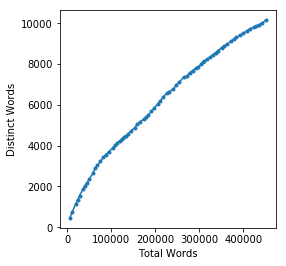

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
xdata=words

#sortdist = x for (y,x) in sorted(zip(words,distwords))

xy = zip(words,distwords)
#print xy
xy.sort()
print xy

sortdist = [x for y, x in xy]
print sortdist
words.sort()
print words

plt.figure(figsize=(8.5,4))
plt.subplot(1,2,1)
plt.xlabel('Total Words'), plt.ylabel('Distinct Words')
plt.plot(words,distwords,'.-')
plt.plot(xdata,np.exp(intercept)*xdata**slope,'r',lw=2)
plt.legend(['Corpus','Best Fit'],loc='upper left')

plt.subplot(1,2,2)
plt.xlabel('Total Words'), plt.ylabel('Distinct Words')
plt.loglog(words,sortdist,'.-')
plt.legend(['Texts'])
plt.xlim([3000,1000000])
plt.tight_layout();




0.693611538161


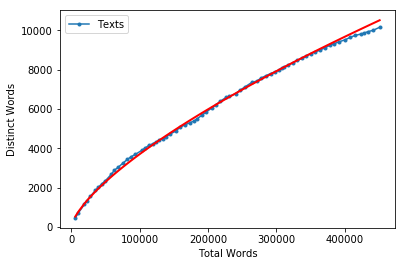

In [8]:
from scipy.stats import linregress
logxdata,logydata = map(np.log,(words,distwords))
slope, intercept, r_value, p_value, std_err = linregress(logxdata,logydata)

plt.figure()
plt.xlabel('Total Words'), plt.ylabel('Distinct Words')
plt.plot(words,distwords,'.-')
plt.plot(xdata,np.exp(intercept)*xdata**slope,'r',lw=2)
plt.legend(['Texts'],loc='upper left');

print slope

In [ ]:
# Question 3
# Part A
# Part 1
import random
N=100000
E=set()
z = 5
L=N*z/2.
while(len(E)<L): E.add(tuple(random.sample(xrange(N),2)))

x_val = [x[0] for x in E]
y_val = [x[1] for x in E]


#plt.plot(x_val,y_val)
#plt.plot(x_val,y_val,'or')
#plt.show()




# The probability of 0 edges was 4.6%, which means we'd expect roughly 5 of the numbers to not have been included
# This exactly matches our empirical results

In [ ]:
degree = Counter([v for edge in E for v in edge])

print np.mean(degree.keys())
print np.std(degree.keys())

print N - len(degree.values())

choose = N*(N-1)/2.
p = L/choose

probNoSucc = (1-p)**N
print probNoSucc

meanNoSucc = probNoSucc*N
print meanNoSucc

# The probability of 0 edges was 0.0067, which means we'd expect roughly 670 of the numbers to not have been included
# This closely matches our empirical results

In [ ]:
#Part A, Subpart 2
print np.mean(degree.values())
#mean very close to z = 5
print N*p

print np.std(degree.values())
print np.sqrt(N*p*(1-p))
# stdev value very close to the predicted std from Poisson, which is N*p*(1-p)


In [ ]:
from scipy.misc import factorial
def poisson(M,z=1): return np.array([np.exp(-z)*z**m/factorial(m) for m in M])
ps = poisson(range(15),z=N*p)

print ps
print len(degree.values())

plt.hist(degree.values())
plt.plot(range(15),ps*N)

In [ ]:
# Question 4, Part B, Part 1
randy = np.random.randint(N,size=100)
#print randy
x = 0
for i in randy:
    x+=degree[i]

#the value for the mean degrees for the verticies is very close to 5, our selected z value
print x/100.

In [ ]:
# Question 4, Part B, Part 2
rands = np.random.randint(N,size=100)
#print rands

neighbors = dict()
for i in E:
    for j in E:
        if i in 
    current = 
    currentlist = [item[0] for item in E if item[1] == current] + [item[1] for item in E if item[0] == current] 
    neighbors[current] = currentlist

Chosenneighbors = []


for i in range(len(rands)):
    current = rands[i]
    currentlist = [item[0] for item in E if item[1] == current] + [item[1] for item in E if item[0] == current]    
    if currentlist != []:
        Chosenneighbors.append(random.choice(currentlist))
    

summer = 0
for i in neighbors:
    current = degree[i]
    summer+= current
    
print summer/float(len(neighbors))

# the mean here is greater than 5 consistently, as we would expect. It is greater by ~50%, which is expected for a single neighbor and for z=3

In [ ]:
# Question 4, Part C
neighbors = dict()
for i in degree.keys():
    current = i
    currentlist = [item[0] for item in E if item[1] == current] + [item[1] for item in E if item[0] == current] 
    neighbors[current] = currentlist

coefs = []
friend_pairs = []
#print neighbors
for j in neighbors.keys():
    friend_pairs += [(f1,f2) for f1 in neighbors[j] for f2 in neighbors[j] if f1<f2]

for x in neighbors.keys():
    current = [(f1,f2) for f1 in neighbors[x] for f2 in neighbors[x] if f1<f2]
    coefs.append(float(len(current))/float(len(friend_pairs)))
print np.mean(coefs)


In [ ]:
# Question 4, Part D [Bonus]

In [ ]:
# Question 5,